In [1]:
import os
import tensorflow as tf
from gan.CGAN import CGanNet
import tensorflow_datasets as tfds
import numpy as np
from keras.datasets.fashion_mnist import load_data
from matplotlib import pyplot
import random

In [2]:
BATCH_SIZE = 32
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28

In [3]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
# Load and prepare dataset

(trainX, labels), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = trainX.astype('float32') / 255.0

In [5]:
cgan = CGanNet(batch_size=BATCH_SIZE,
          batches_per_epoch=40,
          image_width=IMAGE_WIDTH,
          image_height=IMAGE_HEIGHT,
          number_of_channels=1,
          latent_dimension=100,
          training_data=x_train,
          labels_data=labels,
          number_of_classes=10
)

In [125]:
#cgan.clear_files_structure()

In [6]:
cgan.define_discriminator()
cgan.define_generator()
cgan.define_gan()
cgan.create_files_structure()

Dataset size: 60000
Batches per epoch: 40
----> Epoch: 0
40/40 [==============================] - 4s 74ms/step

D_real_loss: 0.1758127510547638 D_fake_loss: 0.7831432819366455 G_loss: 0.6576262712478638
D_real_acc: 1.0 D_fake_acc: 0.0625
----> Epoch: 1
40/40 [==============================] - 3s 77ms/step

D_real_loss: 0.5963576436042786 D_fake_loss: 0.6079818606376648 G_loss: 0.8204098343849182
D_real_acc: 0.8125 D_fake_acc: 0.90625
----> Epoch: 2
40/40 [==============================] - 3s 75ms/step

D_real_loss: 0.424725741147995 D_fake_loss: 0.585710883140564 G_loss: 0.8929749131202698
D_real_acc: 0.96875 D_fake_acc: 0.96875
----> Epoch: 3
40/40 [==============================] - 3s 75ms/step

D_real_loss: 0.5049625635147095 D_fake_loss: 0.5414875745773315 G_loss: 1.0250797271728516
D_real_acc: 0.90625 D_fake_acc: 0.8125
----> Epoch: 4
40/40 [==============================] - 3s 74ms/step

D_real_loss: 0.5419493913650513 D_fake_loss: 0.6048613786697388 G_loss: 0.9118447303771973
D_

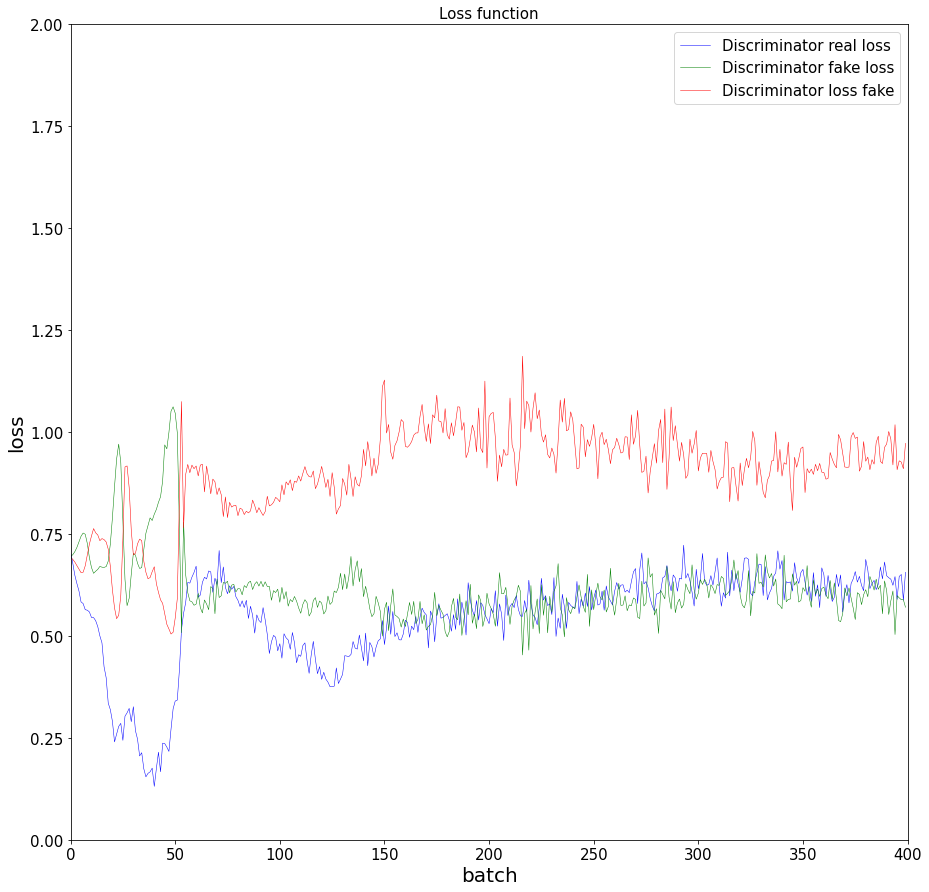

In [127]:
#cgan.train(number_of_epochs=10, load_past_model=False)
#cgan.plot_loss()

Dataset size: 60000
Batches per epoch: 40
----> Load epoch number: 39 from file .epoch
----> Epoch: 40
40/40 [==============================] - 6s 77ms/step

D_real_loss: 0.5368242263793945 D_fake_loss: 0.5193243622779846 G_loss: 1.226313829421997
D_real_acc: 0.78125 D_fake_acc: 0.78125
----> Epoch: 41
40/40 [==============================] - 3s 75ms/step

D_real_loss: 0.4716968238353729 D_fake_loss: 0.532955527305603 G_loss: 1.0948069095611572
D_real_acc: 0.90625 D_fake_acc: 0.78125
----> Load epoch number: 41 from file .epoch


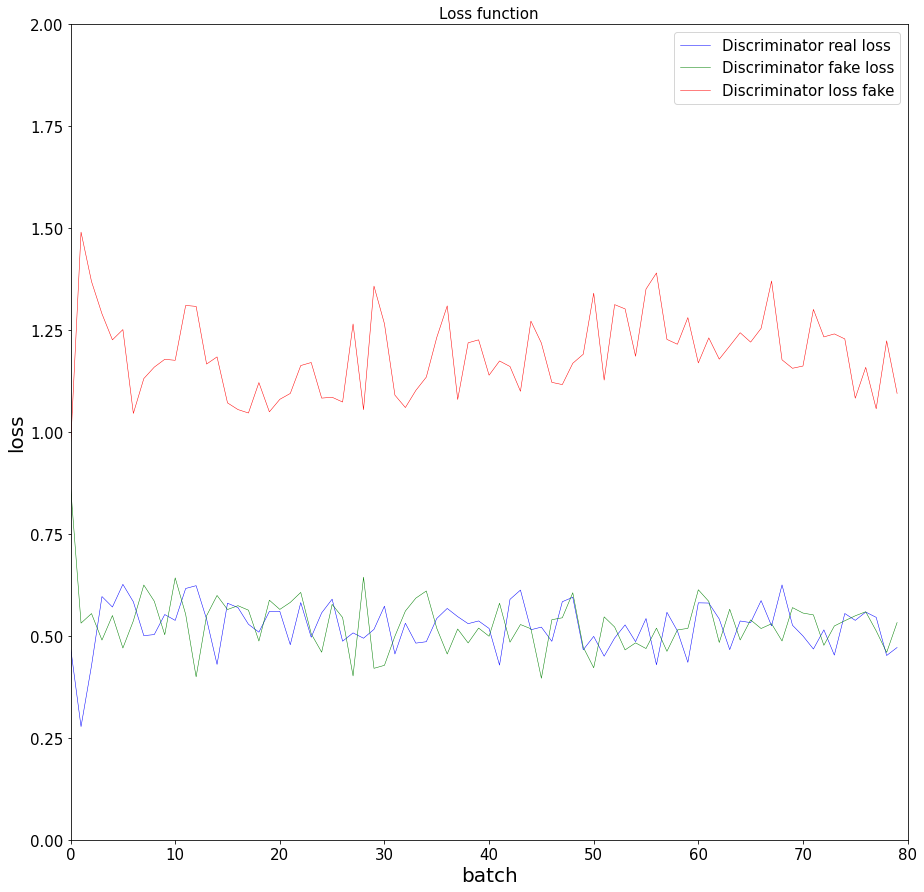

In [7]:
cgan.train(number_of_epochs=2, load_past_model=True)
cgan.plot_loss()

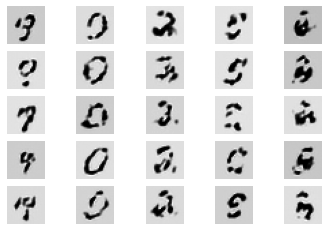

In [9]:
cgan.show_sample_images()